SaaS PRICING MODEL SELECTION - DATA EXPLORATION

1. LOADING CLEANED DATASETS...

✓ Ravenstack: (5000, 26)
✓ CAC-LTV: (7057, 15)
✓ SaaS Businesses: (126, 21)

2. EXPLORING DATASET 1: RAVENSTACK (SaaS SUBSCRIPTION & CHURN)

2.1 Basic Information
Shape: (5000, 26)

Data types:
object     12
bool        7
int64       4
float64     3
Name: count, dtype: int64

First few rows:
  subscription_id account_id  start_date    end_date plan_tier_x  seats_x  \
0        S-8cec59   A-3c1a3f  2023-12-23  2024-04-12  Enterprise       14   
1        S-0f6f44   A-9b9fe9  2024-06-11         NaN         Pro       17   
2        S-51c0d1   A-659280  2024-11-25         NaN  Enterprise       62   
3        S-f81687   A-e7a1e2  2024-11-23  2024-12-13  Enterprise        5   
4        S-cff5a2   A-ba6516  2024-01-10         NaN  Enterprise       27   

   mrr_amount  arr_amount  is_trial_x  upgrade_flag  downgrade_flag  \
0        2786       33432       False         False           False   
1         833        

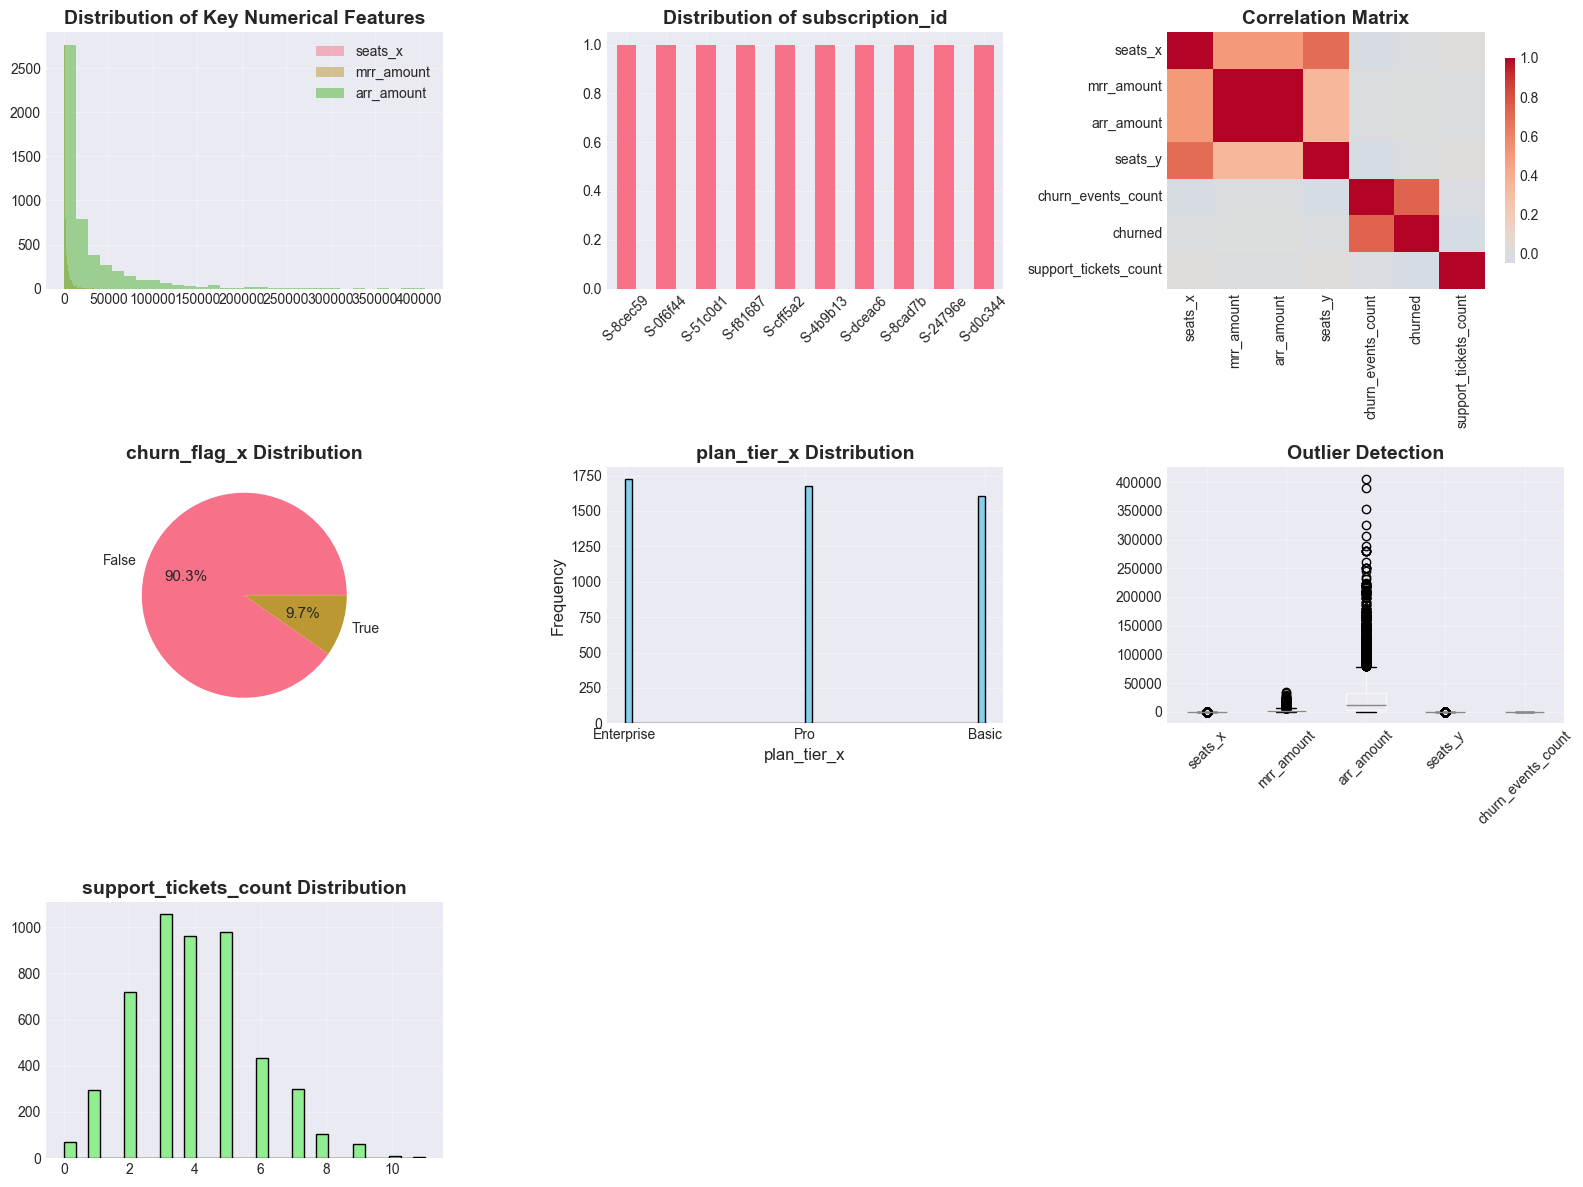


3. EXPLORING DATASET 2: CAC-LTV MODEL

3.1 Basic Information
Shape: (7057, 15)

Columns: ['year', 'month', 'date', 'customer_id', 'acquisition_channel', 'signup_source', 'region', 'customer_tier', 'plan_price', 'discount_rate', 'arpu', 'gross_margin', 'churn_rate', 'contract_length_months', 'marketing_spend']

First few rows:
   year  month    date  customer_id acquisition_channel signup_source  \
0  2023      1  Jan-23         1001      outbound_sales           web   
1  2023      1  Jan-23         1002            meta_ads           web   
2  2023      1  Jan-23         1003      organic_search    mobile_app   
3  2023      1  Jan-23         1004      organic_search           web   
4  2023      1  Jan-23         1005      organic_search           web   

          region customer_tier  plan_price  discount_rate    arpu  \
0  North America         Basic       78.84            0.1   63.63   
1          LatAm           Pro      120.23            0.0  124.47   
2  North America    Enter

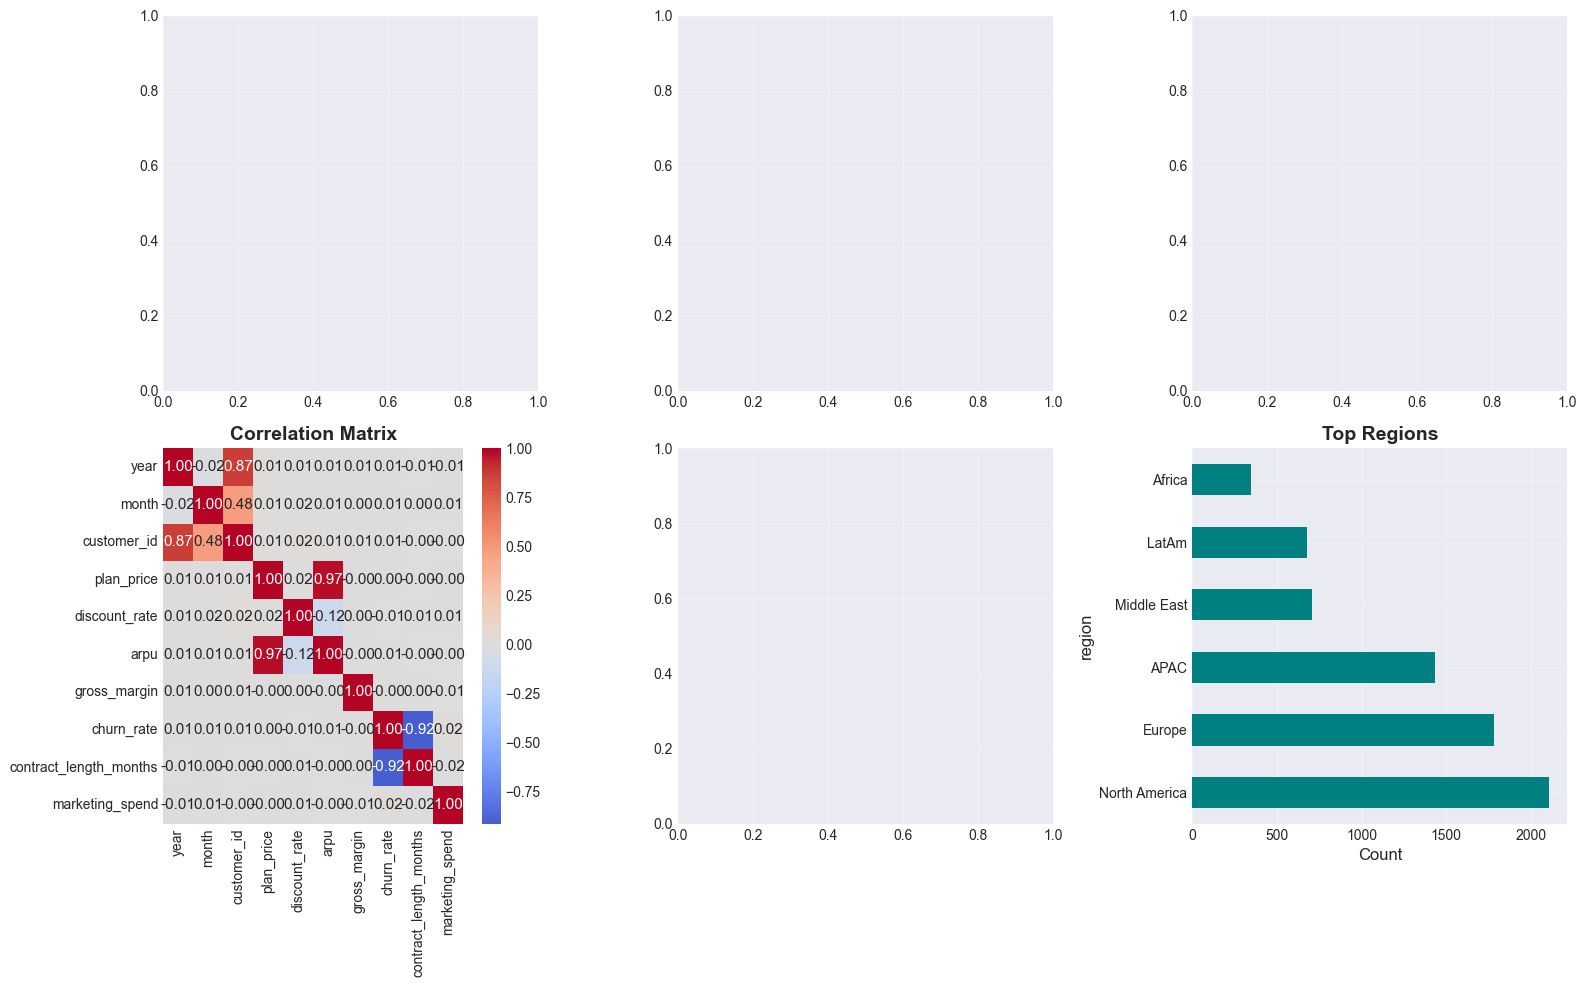


4. EXPLORING DATASET 3: SAAS BUSINESSES

4.1 Basic Information
Shape: (126, 21)

Columns: ['date', 'askingPrice', 'revenueMultiple', 'listingHeadline', 'listingType', 'totalRevenueAnnual', 'totalProfitAnnual', 'totalGrowthAnnual', 'location', 'dateFounded', 'team', 'about', 'revenue', 'customers', 'keywords', 'annualProfit', 'growthAnnual', 'techStack', 'businessModel', 'competitors', 'weeklyViews']

First few rows:
         date  askingPrice  revenueMultiple  \
0  2023-04-05     11693846              7.1   
1  2023-03-29      1000000              0.7   
2  2023-03-29      1500000              5.0   
3  2023-03-09      1800000              1.5   
4  2023-02-28      7302360              5.0   

                                     listingHeadline listingType  \
0  Low-Code SaaS Platform  specifically designed ...    platinum   
1  High-quality, ethical, and global proxy lists ...    platinum   
2  Cost-effective, no-code platform for SMBs to c...    platinum   
3       Social Media Man

Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\

  ✓ Saved: Cleaned Data/saas_businesses_figure1.png


Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.


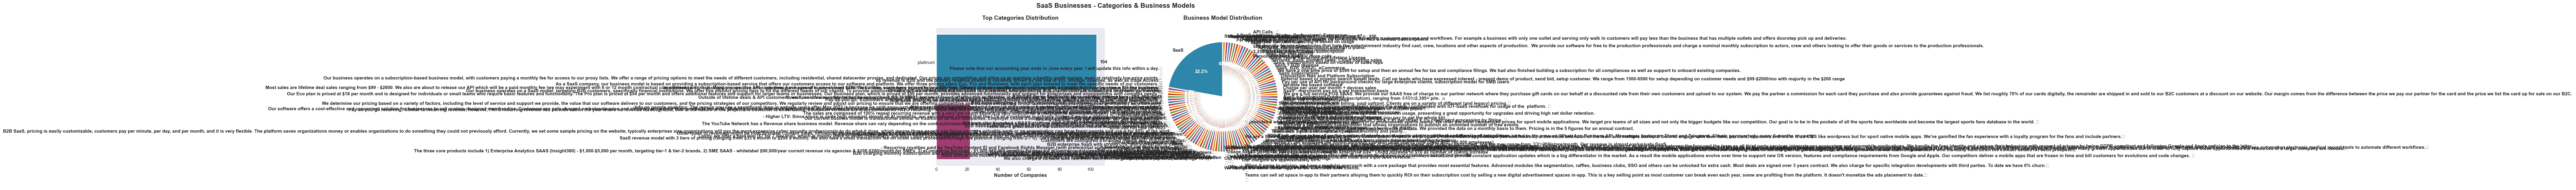


  Creating Figure 2: Numerical Features Analysis...
  ✓ Saved: Cleaned Data/saas_businesses_figure2.png


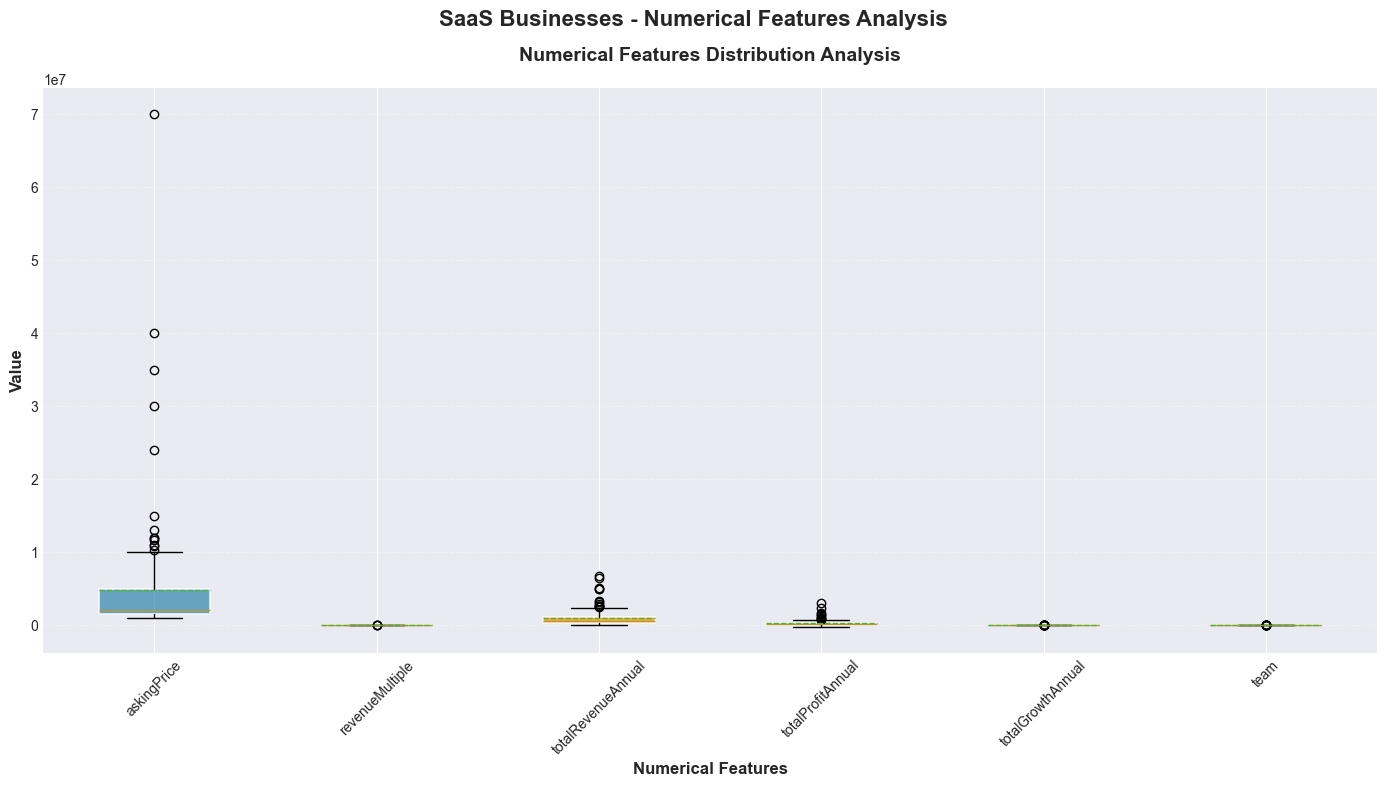


  Creating Figure 3: Summary Statistics...
  ✓ Saved: Cleaned Data/saas_businesses_figure3.png


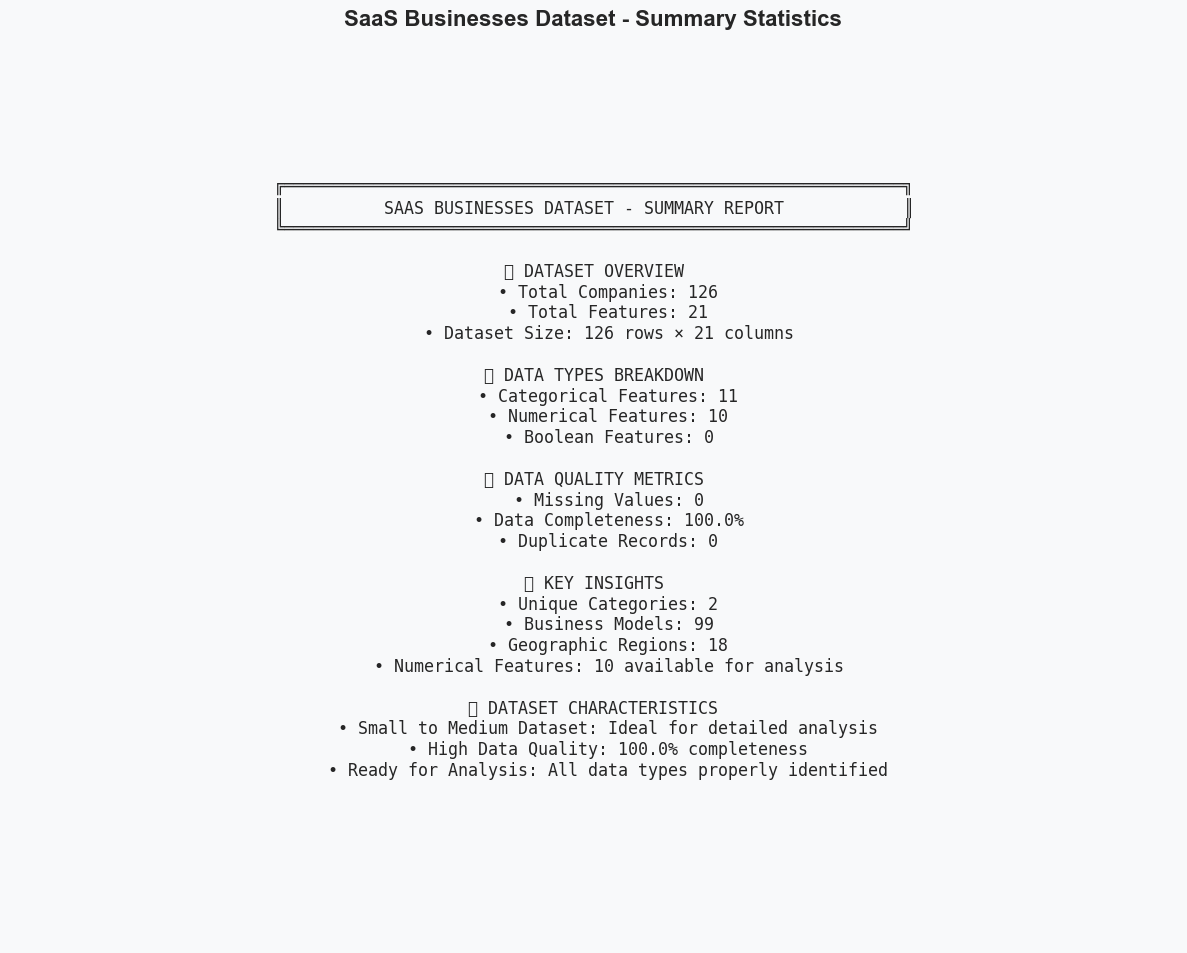


✓ All Dataset 3 visualizations created successfully!

5. CROSS-DATASET INSIGHTS

5.1 Dataset Comparison
           Dataset  Records  Features  Numerical  Categorical
0       Ravenstack     5000        26          7           12
1          CAC-LTV     7057        15         10            5
2  SaaS Businesses      126        21         10           11

5.2 Key Findings:
  • Largest dataset: CAC-LTV (7,057 records)
  • Most features: Ravenstack (26 features)
  • Total records across all datasets: 12,183

✓ DATA EXPLORATION COMPLETED SUCCESSFULLY!

Next Steps:
  1. Feature engineering and selection
  2. Model training (Linear/Polynomial Regression, Decision Trees)
  3. Customer segmentation (K-Means Clustering)
  4. Model evaluation and comparison


In [ ]:
# SaaS Pricing Model - Data Loading and Exploration
# Student: Sanskriti Avinash Dabhade (1225131)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set professional styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
pd.set_option('display.max_columns', None)

print("=" * 80)
print("SaaS PRICING MODEL SELECTION - DATA EXPLORATION")
print("=" * 80)

# ============================================================================
# SECTION 1: LOAD CLEANED DATASETS
# ============================================================================

print("\n1. LOADING CLEANED DATASETS...")

# Load cleaned datasets
ravenstack = pd.read_csv('Cleaned Data/ravenstack_cleaned.csv')
cac_ltv = pd.read_csv('Cleaned Data/cac_ltv_cleaned.csv')
saas_businesses = pd.read_csv('Cleaned Data/saas_businesses_cleaned.csv')

print(f"\n✓ Ravenstack: {ravenstack.shape}")
print(f"✓ CAC-LTV: {cac_ltv.shape}")
print(f"✓ SaaS Businesses: {saas_businesses.shape}")

# ============================================================================
# SECTION 2: DATASET 1 - RAVENSTACK EXPLORATION
# ============================================================================

print("\n" + "=" * 80)
print("2. EXPLORING DATASET 1: RAVENSTACK (SaaS SUBSCRIPTION & CHURN)")
print("=" * 80)

print("\n2.1 Basic Information")
print(f"Shape: {ravenstack.shape}")
print(f"\nData types:\n{ravenstack.dtypes.value_counts()}")
print(f"\nFirst few rows:")
print(ravenstack.head())

print("\n2.2 Summary Statistics")
print(ravenstack.describe())

# Identify key columns for analysis
print("\n2.3 Key Columns Identified:")
pricing_cols = [col for col in ravenstack.columns if any(term in col.lower() for term in ['price', 'cost', 'revenue', 'plan'])]
churn_cols = [col for col in ravenstack.columns if 'churn' in col.lower()]
usage_cols = [col for col in ravenstack.columns if any(term in col.lower() for term in ['usage', 'feature', 'support'])]

print(f"  - Pricing columns: {pricing_cols}")
print(f"  - Churn columns: {churn_cols}")
print(f"  - Usage columns: {usage_cols}")

# Visualizations for Ravenstack
print("\n2.4 Creating visualizations...")

fig = plt.figure(figsize=(16, 12))

# Subplot 1: Distribution of numerical features
ax1 = plt.subplot(3, 3, 1)
numerical_cols = ravenstack.select_dtypes(include=[np.number]).columns[:6]
for col in numerical_cols[:3]:
    ax1.hist(ravenstack[col].dropna(), alpha=0.5, label=col[:20], bins=30)
ax1.set_title('Distribution of Key Numerical Features', fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Subplot 2: Categorical features
ax2 = plt.subplot(3, 3, 2)
categorical_cols = ravenstack.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    col = categorical_cols[0]
    ravenstack[col].value_counts().head(10).plot(kind='bar', ax=ax2)
    ax2.set_title(f'Distribution of {col[:30]}', fontweight='bold')
    ax2.set_xlabel('')
    ax2.tick_params(axis='x', rotation=45)
ax2.grid(alpha=0.3)

# Subplot 3: Correlation heatmap
ax3 = plt.subplot(3, 3, 3)
correlation_cols = ravenstack.select_dtypes(include=[np.number]).columns[:8]
corr_matrix = ravenstack[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, ax=ax3, cbar_kws={'shrink': 0.8})
ax3.set_title('Correlation Matrix', fontweight='bold')

# Subplot 4: Churn analysis (if churn column exists)
ax4 = plt.subplot(3, 3, 4)
if len(churn_cols) > 0:
    churn_col = churn_cols[0]
    ravenstack[churn_col].value_counts().plot(kind='pie', ax=ax4, autopct='%1.1f%%')
    ax4.set_title(f'{churn_col} Distribution', fontweight='bold')
    ax4.set_ylabel('')
else:
    ax4.text(0.5, 0.5, 'No churn column found', ha='center', va='center')
    ax4.axis('off')

# Subplot 5: Pricing distribution
ax5 = plt.subplot(3, 3, 5)
if len(pricing_cols) > 0:
    col = pricing_cols[0]
    ravenstack[col].hist(bins=50, ax=ax5, color='skyblue', edgecolor='black')
    ax5.set_title(f'{col} Distribution', fontweight='bold')
    ax5.set_xlabel(col)
    ax5.set_ylabel('Frequency')
ax5.grid(alpha=0.3)

# Subplot 6: Boxplot for outlier detection
ax6 = plt.subplot(3, 3, 6)
numerical_sample = ravenstack.select_dtypes(include=[np.number]).columns[:5]
ravenstack[numerical_sample].boxplot(ax=ax6)
ax6.set_title('Outlier Detection', fontweight='bold')
ax6.tick_params(axis='x', rotation=45)
ax6.grid(alpha=0.3)

# Subplot 7-9: Additional analysis based on available columns
if len(usage_cols) > 0:
    ax7 = plt.subplot(3, 3, 7)
    col = usage_cols[0]
    ravenstack[col].hist(bins=30, ax=ax7, color='lightgreen', edgecolor='black')
    ax7.set_title(f'{col[:30]} Distribution', fontweight='bold')
    ax7.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Cleaned Data/ravenstack_exploration.png', dpi=300, bbox_inches='tight')
print("✓ Saved: Cleaned Data/ravenstack_exploration.png")
plt.show()

# ============================================================================
# SECTION 3: DATASET 2 - CAC-LTV EXPLORATION
# ============================================================================

print("\n" + "=" * 80)
print("3. EXPLORING DATASET 2: CAC-LTV MODEL")
print("=" * 80)

print("\n3.1 Basic Information")
print(f"Shape: {cac_ltv.shape}")
print(f"\nColumns: {list(cac_ltv.columns)}")
print(f"\nFirst few rows:")
print(cac_ltv.head())

print("\n3.2 Summary Statistics")
print(cac_ltv.describe())

# CAC-LTV specific analysis
print("\n3.3 CAC-LTV Metrics Analysis")
cac_cols = [col for col in cac_ltv.columns if 'cac' in col.lower()]
ltv_cols = [col for col in cac_ltv.columns if 'ltv' in col.lower()]
print(f"  - CAC columns: {cac_cols}")
print(f"  - LTV columns: {ltv_cols}")

# Visualizations for CAC-LTV
print("\n3.4 Creating visualizations...")

fig = plt.figure(figsize=(16, 10))

# Subplot 1: CAC distribution
ax1 = plt.subplot(2, 3, 1)
if len(cac_cols) > 0:
    cac_ltv[cac_cols[0]].hist(bins=50, ax=ax1, color='coral', edgecolor='black')
    ax1.set_title(f'{cac_cols[0]} Distribution', fontweight='bold')
    ax1.set_xlabel(cac_cols[0])
    ax1.set_ylabel('Frequency')
ax1.grid(alpha=0.3)

# Subplot 2: LTV distribution
ax2 = plt.subplot(2, 3, 2)
if len(ltv_cols) > 0:
    cac_ltv[ltv_cols[0]].hist(bins=50, ax=ax2, color='lightblue', edgecolor='black')
    ax2.set_title(f'{ltv_cols[0]} Distribution', fontweight='bold')
    ax2.set_xlabel(ltv_cols[0])
    ax2.set_ylabel('Frequency')
ax2.grid(alpha=0.3)

# Subplot 3: LTV/CAC Ratio (if both exist)
ax3 = plt.subplot(2, 3, 3)
if len(cac_cols) > 0 and len(ltv_cols) > 0:
    ratio = cac_ltv[ltv_cols[0]] / cac_ltv[cac_cols[0]]
    ratio.hist(bins=50, ax=ax3, color='gold', edgecolor='black')
    ax3.set_title('LTV/CAC Ratio Distribution', fontweight='bold')
    ax3.axvline(x=3, color='green', linestyle='--', linewidth=2, label='Healthy (3.0)')
    ax3.legend()
    ax3.set_xlabel('LTV/CAC Ratio')
    ax3.set_ylabel('Frequency')
ax3.grid(alpha=0.3)

# Subplot 4: Correlation
ax4 = plt.subplot(2, 3, 4)
corr_matrix = cac_ltv.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax4, fmt='.2f')
ax4.set_title('Correlation Matrix', fontweight='bold')

# Subplot 5: Scatter plot CAC vs LTV
ax5 = plt.subplot(2, 3, 5)
if len(cac_cols) > 0 and len(ltv_cols) > 0:
    ax5.scatter(cac_ltv[cac_cols[0]], cac_ltv[ltv_cols[0]], alpha=0.5, color='purple')
    ax5.set_title('CAC vs LTV', fontweight='bold')
    ax5.set_xlabel(cac_cols[0])
    ax5.set_ylabel(ltv_cols[0])
    # Add 3:1 ratio line
    max_val = max(cac_ltv[cac_cols[0]].max(), cac_ltv[ltv_cols[0]].max())
    x_line = np.linspace(0, max_val, 100)
    ax5.plot(x_line, 3 * x_line, 'r--', linewidth=2, label='3:1 Ratio', alpha=0.7)
    ax5.legend()
ax5.grid(alpha=0.3)

# Subplot 6: Regional analysis (if region column exists)
ax6 = plt.subplot(2, 3, 6)
region_cols = [col for col in cac_ltv.columns if 'region' in col.lower() or 'country' in col.lower()]
if len(region_cols) > 0:
    cac_ltv[region_cols[0]].value_counts().head(10).plot(kind='barh', ax=ax6, color='teal')
    ax6.set_title(f'Top Regions', fontweight='bold')
    ax6.set_xlabel('Count')
else:
    ax6.text(0.5, 0.5, 'No region data available', ha='center', va='center')
    ax6.axis('off')
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Cleaned Data/cac_ltv_exploration.png', dpi=300, bbox_inches='tight')
print("✓ Saved: Cleaned Data/cac_ltv_exploration.png")
plt.show()

# ============================================================================
# SECTION 4: DATASET 3 - SAAS BUSINESSES EXPLORATION
# ============================================================================

print("\n" + "=" * 80)
print("4. EXPLORING DATASET 3: SAAS BUSINESSES")
print("=" * 80)

print("\n4.1 Basic Information")
print(f"Shape: {saas_businesses.shape}")
print(f"\nColumns: {list(saas_businesses.columns)}")
print(f"\nFirst few rows:")
print(saas_businesses.head())

print("\n4.2 Summary Statistics")
print(saas_businesses.describe(include='all'))

# Visualizations for SaaS Businesses
print("\n4.3 Creating visualizations...")

# Modern color palette
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E', '#BC4749']

# Identify key columns
category_cols = [col for col in saas_businesses.columns if any(term in col.lower() for term in ['category', 'type', 'industry'])]
model_cols = [col for col in saas_businesses.columns if 'model' in col.lower()]
region_cols = [col for col in saas_businesses.columns if any(term in col.lower() for term in ['region', 'country', 'location'])]
numerical_cols = saas_businesses.select_dtypes(include=[np.number]).columns

# ============================================================================
# FIGURE 1: Categorical Overview
# ============================================================================
print("\n  Creating Figure 1: Categorical Overview...")

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Top Categories - Horizontal Bar
if len(category_cols) > 0:
    cat_data = saas_businesses[category_cols[0]].value_counts().head(10)
    bars = ax1.barh(range(len(cat_data)), cat_data.values, color=colors[:len(cat_data)], 
                   edgecolor='white', linewidth=2)
    ax1.set_yticks(range(len(cat_data)))
    ax1.set_yticklabels([label[:25] for label in cat_data.index], fontsize=11)
    ax1.set_xlabel('Number of Companies', fontsize=12, fontweight='bold')
    ax1.set_title('Top Categories Distribution', fontsize=14, fontweight='bold', pad=20)
    # Add value labels
    for i, (idx, val) in enumerate(cat_data.items()):
        ax1.text(val + max(cat_data.values)*0.02, i, f'{val}', 
                va='center', fontsize=11, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x', linestyle='--')
    ax1.invert_yaxis()
else:
    ax1.text(0.5, 0.5, 'No category data available', ha='center', va='center', fontsize=14)
    ax1.axis('off')

# Plot 2: Business Model Distribution - Pie Chart
if len(model_cols) > 0:
    model_data = saas_businesses[model_cols[0]].value_counts()
    wedges, texts, autotexts = ax2.pie(model_data.values, 
                                       labels=model_data.index,
                                       autopct='%1.1f%%', 
                                       startangle=90, 
                                       colors=colors[:len(model_data)],
                                       textprops={'fontsize': 11, 'fontweight': 'bold'},
                                       wedgeprops=dict(edgecolor='white', linewidth=2.5))
    ax2.set_title('Business Model Distribution', fontsize=14, fontweight='bold', pad=20)
    # Make percentage text more visible
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(11)
else:
    ax2.text(0.5, 0.5, 'No business model data', ha='center', va='center', fontsize=14)
    ax2.axis('off')

plt.suptitle('SaaS Businesses - Categorical Overview', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('Cleaned Data/saas_businesses_figure1.png', dpi=300, bbox_inches='tight', facecolor='white')
print("  ✓ Saved: Cleaned Data/saas_businesses_figure1.png")
plt.show()

# ============================================================================
# FIGURE 2: Numerical Analysis
# ============================================================================
print("\n  Creating Figure 2: Numerical Analysis...")

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Numerical Features Box Plot
if len(numerical_cols) > 0:
    # Select top 5-6 numerical columns
    top_numerical = numerical_cols[:min(6, len(numerical_cols))]
    # Create box plot data
    box_data = [saas_businesses[col].dropna().values for col in top_numerical]
    bp = ax1.boxplot(box_data, labels=[col[:15] for col in top_numerical], 
                    patch_artist=True, showmeans=True, meanline=True)
    ax1.set_ylabel('Value', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Numerical Features', fontsize=12, fontweight='bold')
    ax1.set_title('Numerical Features Distribution', fontsize=14, fontweight='bold', pad=20)
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3, axis='y', linestyle='--')
    # Color the boxes
    for patch, color in zip(bp['boxes'], colors[:len(top_numerical)]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
        patch.set_edgecolor('white')
        patch.set_linewidth(1.5)
else:
    ax1.text(0.5, 0.5, 'No numerical data available', ha='center', va='center', fontsize=14)
    ax1.axis('off')

# Plot 2: Summary Statistics
ax2.axis('off')

# Calculate key metrics
total_companies = len(saas_businesses)
total_features = len(saas_businesses.columns)
cat_count = len(saas_businesses.select_dtypes(include=['object']).columns)
num_count = len(saas_businesses.select_dtypes(include=[np.number]).columns)
bool_count = len(saas_businesses.select_dtypes(include=['bool']).columns)
missing_vals = saas_businesses.isnull().sum().sum()
completeness = (1 - missing_vals / (total_companies * total_features)) * 100
duplicates = saas_businesses.duplicated().sum()

# Create summary text
summary_text = f"""
╔══════════════════════════════════════════════════════════╗
║     SAAS BUSINESSES DATASET - SUMMARY REPORT             ║
╚══════════════════════════════════════════════════════════╝

📊 DATASET OVERVIEW
   • Total Companies: {total_companies:,}
   • Total Features: {total_features}
   • Dataset Size: {total_companies:,} rows × {total_features} columns

📈 DATA TYPES BREAKDOWN
   • Categorical Features: {cat_count}
   • Numerical Features: {num_count}
   • Boolean Features: {bool_count}

✅ DATA QUALITY METRICS
   • Missing Values: {missing_vals:,}
   • Data Completeness: {completeness:.1f}%
   • Duplicate Records: {duplicates}

🔍 KEY INSIGHTS
   • Unique Categories: {len(saas_businesses[category_cols[0]].unique()) if len(category_cols) > 0 else 'N/A'}
   • Business Models: {len(saas_businesses[model_cols[0]].unique()) if len(model_cols) > 0 else 'N/A'}
   • Geographic Regions: {len(saas_businesses[region_cols[0]].unique()) if len(region_cols) > 0 else 'N/A'}
   • Numerical Features: {len(numerical_cols)} available

📋 DATASET CHARACTERISTICS
   • Small to Medium Dataset
   • High Data Quality: {completeness:.1f}% completeness
   • Ready for Analysis
"""

ax2.text(0.5, 0.5, summary_text, fontsize=11, family='monospace',
        verticalalignment='center', horizontalalignment='center',
        bbox=dict(boxstyle='round', facecolor='#f8f9fa', alpha=0.95, 
                 edgecolor=colors[0], linewidth=3, pad=20))

plt.suptitle('SaaS Businesses - Numerical Analysis & Summary', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('Cleaned Data/saas_businesses_figure2.png', dpi=300, bbox_inches='tight', facecolor='white')
print("  ✓ Saved: Cleaned Data/saas_businesses_figure2.png")
plt.show()

print("\n✓ All Dataset 3 visualizations created successfully!")

# ============================================================================
# SECTION 5: CROSS-DATASET INSIGHTS
# ============================================================================

print("\n" + "=" * 80)
print("5. CROSS-DATASET INSIGHTS")
print("=" * 80)

print("\n5.1 Dataset Comparison")
comparison = pd.DataFrame({
    'Dataset': ['Ravenstack', 'CAC-LTV', 'SaaS Businesses'],
    'Records': [len(ravenstack), len(cac_ltv), len(saas_businesses)],
    'Features': [len(ravenstack.columns), len(cac_ltv.columns), len(saas_businesses.columns)],
    'Numerical': [len(ravenstack.select_dtypes(include=[np.number]).columns),
                  len(cac_ltv.select_dtypes(include=[np.number]).columns),
                  len(saas_businesses.select_dtypes(include=[np.number]).columns)],
    'Categorical': [len(ravenstack.select_dtypes(include=['object']).columns),
                    len(cac_ltv.select_dtypes(include=['object']).columns),
                    len(saas_businesses.select_dtypes(include=['object']).columns)]
})
print(comparison)

print("\n5.2 Key Findings:")
print(f"  • Largest dataset: {comparison.loc[comparison['Records'].idxmax(), 'Dataset']} ({comparison['Records'].max():,} records)")
print(f"  • Most features: {comparison.loc[comparison['Features'].idxmax(), 'Dataset']} ({comparison['Features'].max()} features)")
print(f"  • Total records across all datasets: {comparison['Records'].sum():,}")

print("\n" + "=" * 80)
print("✓ DATA EXPLORATION COMPLETED SUCCESSFULLY!")
print("=" * 80)
print("\nNext Steps:")
print("  1. Feature engineering and selection")
print("  2. Model training (Linear/Polynomial Regression, Decision Trees)")
print("  3. Customer segmentation (K-Means Clustering)")
print("  4. Model evaluation and comparison")